In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import os

df = pd.read_csv("Mall_Customers.csv")

In [81]:
print(df.describe(include='all'))
print(df['Gender'].value_counts())

        CustomerID  Gender         Age  Ingresos anual  Puntaje de gasto
count   200.000000     200  200.000000      200.000000        200.000000
unique         NaN       2         NaN             NaN               NaN
top            NaN  Female         NaN             NaN               NaN
freq           NaN     112         NaN             NaN               NaN
mean    100.500000     NaN   38.850000       60.560000         50.200000
std      57.879185     NaN   13.969007       26.264721         25.823522
min       1.000000     NaN   18.000000       15.000000          1.000000
25%      50.750000     NaN   28.750000       41.500000         34.750000
50%     100.500000     NaN   36.000000       61.500000         50.000000
75%     150.250000     NaN   49.000000       78.000000         73.000000
max     200.000000     NaN   70.000000      137.000000         99.000000
Gender
Female    112
Male       88
Name: count, dtype: int64


In [97]:
df.rename(columns={
    "Annual Income (k$)": "Ingresos anual",
    "Spending Score (1-100)": "Puntaje de gasto"
}, inplace=True)

In [49]:
print(df.columns.tolist())


['CustomerID', 'Gender', 'Age', 'Ingresos anual', 'Puntaje de gasto']


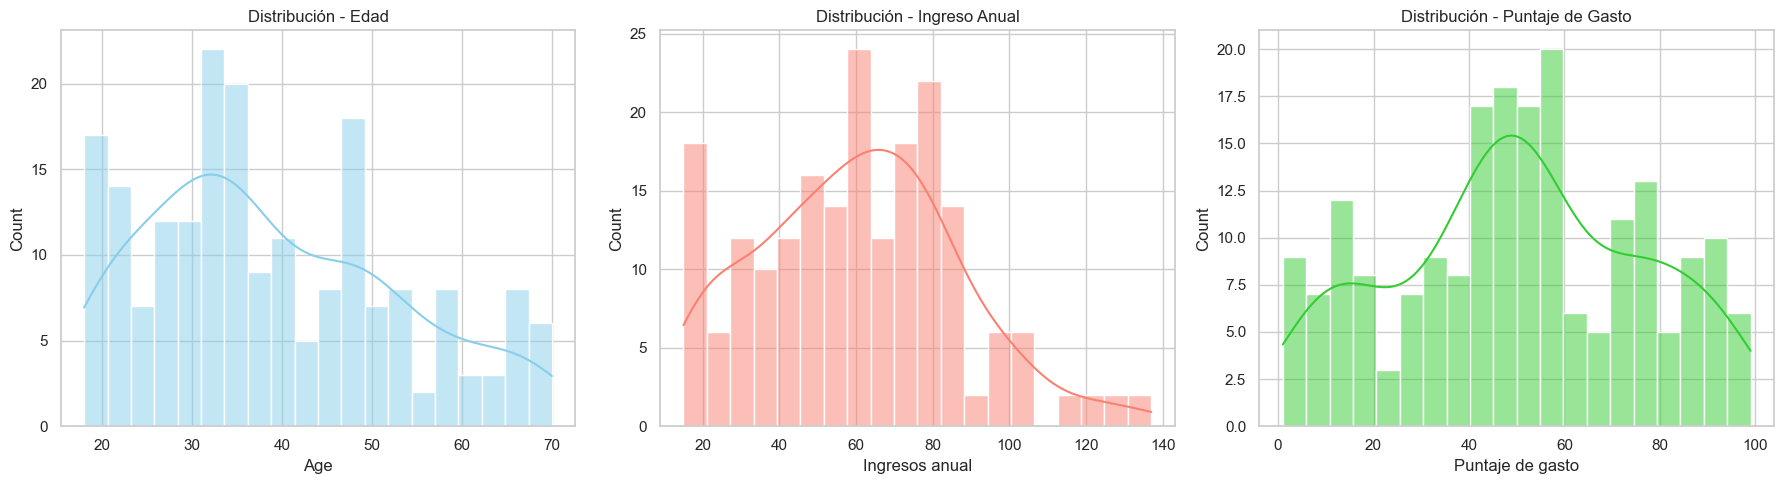

In [55]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Age'], kde=True, bins=20, ax=axs[0], color='skyblue')
axs[0].set_title('Distribución - Edad')

sns.histplot(df['Ingresos anual'], kde=True, bins=20, ax=axs[1], color='salmon')
axs[1].set_title('Distribución - Ingreso Anual')

sns.histplot(df['Puntaje de gasto'], kde=True, bins=20, ax=axs[2], color='limegreen')
axs[2].set_title('Distribución - Puntaje de Gasto')

plt.tight_layout()
plt.show()

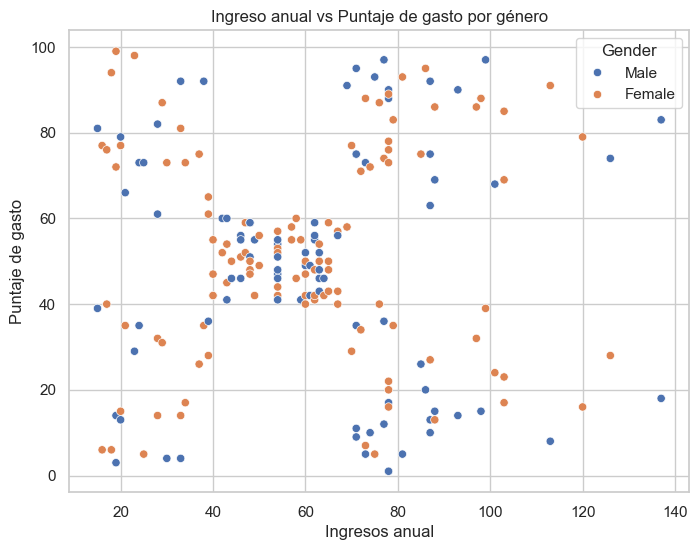

In [53]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Ingresos anual', y='Puntaje de gasto', hue='Gender')
plt.title('Ingreso anual vs Puntaje de gasto por género')
plt.show()

In [61]:
df.isnull().sum()

Gender              0
Age                 0
Ingresos anual      0
Puntaje de gasto    0
dtype: int64

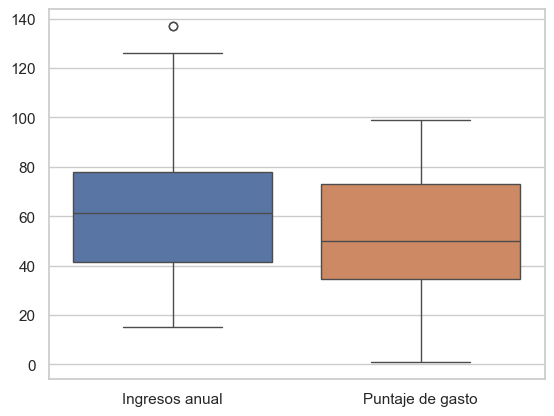

In [63]:
df.describe()

sns.boxplot(data=df[['Ingresos anual', 'Puntaje de gasto']])
plt.show()

In [101]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])


In [73]:
scaler = StandardScaler()
df_scaled = df[['Ingresos anual', 'Puntaje de gasto']]
df_scaled = scaler.fit_transform(df_scaled)

In [59]:
df.drop("CustomerID", axis=1, inplace=True)

In [95]:
features = ['Gender', 'Age', 'Ingresos anual', 'Puntaje de gasto']

In [103]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

In [85]:
corr = df[features].corr()

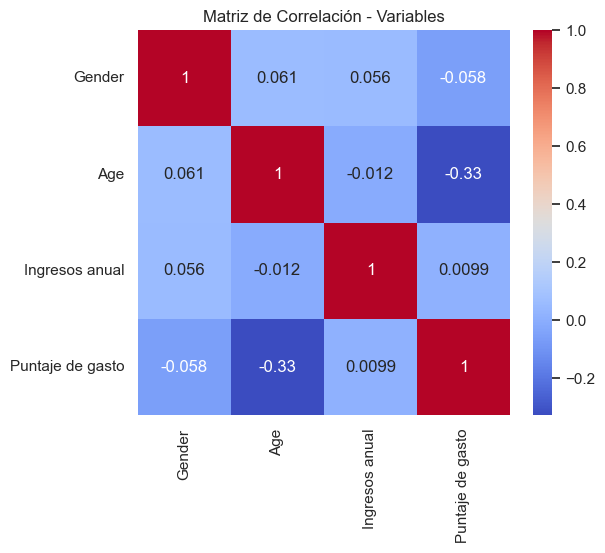

In [199]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación - Variables')
plt.show()

In [158]:
sel = VarianceThreshold(threshold=0.5)
X_selected_scaled = sel.fit_transform(X_scaled)

mask = sel.get_support()
selected_features = [f for f, m in zip(features, mask) if m]
print("Variables seleccionadas según varianza:", selected_features)

Variables seleccionadas según varianza: ['Gender', 'Age', 'Ingresos anual', 'Puntaje de gasto']


In [170]:
mbkmeans = MiniBatchKMeans(n_clusters=3, batch_size=32, random_state=42)
clusters = mbkmeans.fit_predict(X_selected_scaled)

C:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [166]:
kmeans = MiniBatchKMeans(n_clusters=4, batch_size=1024, random_state=42)
kmeans.fit(X_selected_scaled)

C:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=4, random_state=42)

In [174]:
labels = kmeans.predict(X_selected_scaled)

In [176]:
silhouette = silhouette_score(X_selected_scaled, labels)
calinski = calinski_harabasz_score(X_selected_scaled, labels)

print(f"Coeficiente de Silhouette: {silhouette:.4f}")
print(f"Índice de Calinski-Harabasz: {calinski:.4f}")

Coeficiente de Silhouette: 0.2902
Índice de Calinski-Harabasz: 66.7943


In [178]:
for k in range(2, 11):
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=1024, random_state=42)
    kmeans.fit(X_selected_scaled)
    labels = kmeans.predict(X_selected_scaled)
    
    sil_score = silhouette_score(X_selected_scaled, labels)
    calinski_score = calinski_harabasz_score(X_selected_scaled, labels)
    
    print(f"Clusters: {k} | Silhouette: {sil_score:.4f} | Calinski-Harabasz: {calinski_score:.2f}")

C:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\U

Clusters: 2 | Silhouette: 0.2518 | Calinski-Harabasz: 71.02
Clusters: 3 | Silhouette: 0.2507 | Calinski-Harabasz: 64.04
Clusters: 4 | Silhouette: 0.2902 | Calinski-Harabasz: 66.79
Clusters: 5 | Silhouette: 0.3168 | Calinski-Harabasz: 70.73


C:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\U

Clusters: 6 | Silhouette: 0.3345 | Calinski-Harabasz: 73.43
Clusters: 7 | Silhouette: 0.3594 | Calinski-Harabasz: 76.39
Clusters: 8 | Silhouette: 0.3038 | Calinski-Harabasz: 67.35
Clusters: 9 | Silhouette: 0.3598 | Calinski-Harabasz: 76.26
Clusters: 10 | Silhouette: 0.3761 | Calinski-Harabasz: 79.72


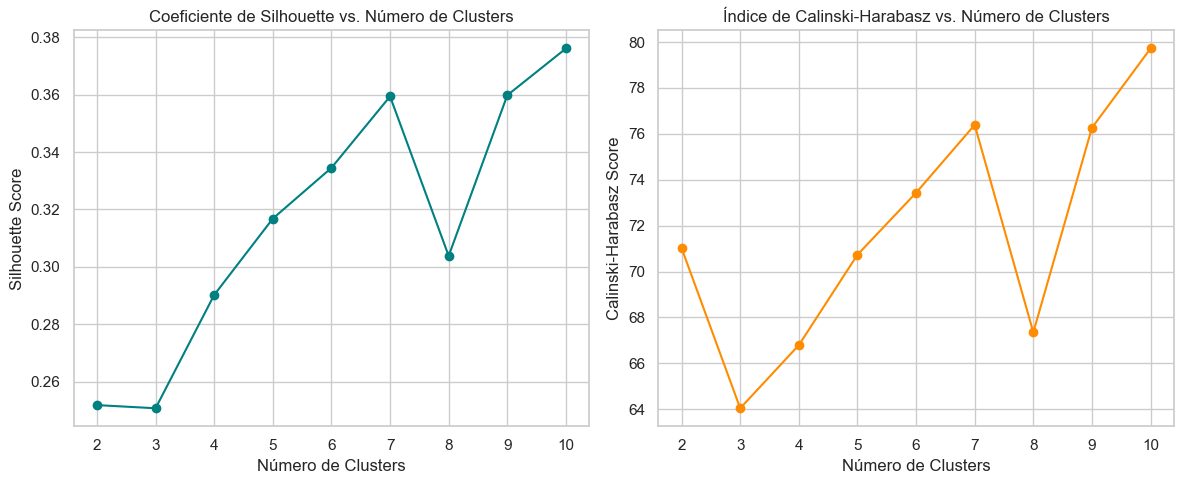

In [180]:
clusters = list(range(2, 11))
silhouette_scores = [0.2518, 0.2507, 0.2902, 0.3168, 0.3345, 0.3594, 0.3038, 0.3598, 0.3761]
calinski_scores = [71.02, 64.04, 66.79, 70.73, 73.43, 76.39, 67.35, 76.26, 79.72]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(clusters, silhouette_scores, marker='o', color='teal')
plt.title('Coeficiente de Silhouette vs. Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(clusters, calinski_scores, marker='o', color='darkorange')
plt.title('Índice de Calinski-Harabasz vs. Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Calinski-Harabasz Score')

plt.tight_layout()
plt.show()

In [186]:
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

C:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


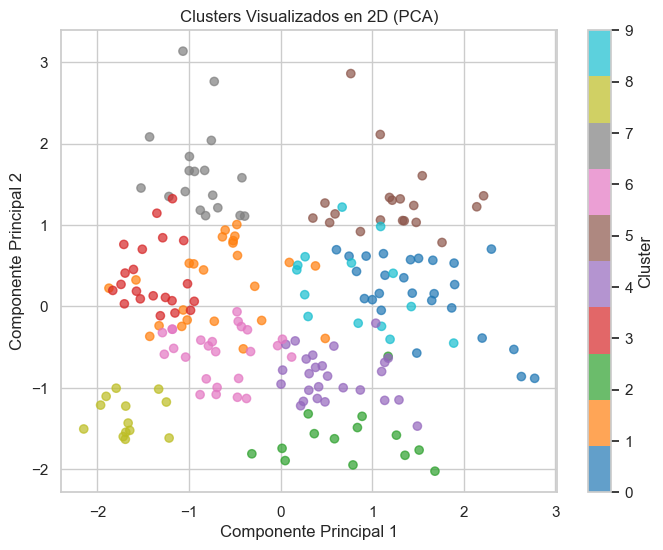

In [188]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.title('Clusters Visualizados en 2D (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [196]:
centroides = kmeans.cluster_centers_
print(centroides)


[[ 1.12815215  1.43505777 -0.45298304 -0.40195247]
 [ 1.12815215 -0.97602698 -0.73705168  0.41603773]
 [-0.7425083   0.16967696 -1.31640908 -1.1668652 ]
 [-0.88640526 -0.47793198  0.97284787  1.22158511]
 [-0.88640526  1.09830638 -0.24158313 -0.04807901]
 [ 1.12815215 -0.02700694  0.96701244 -1.39716754]
 [-0.88640526 -0.78153925 -0.12214217 -0.11957041]
 [ 1.12815215 -0.39989994  1.01344075  1.26040667]
 [-0.88640526 -0.96084556 -1.33087991  1.17778643]
 [-0.88640526  0.35421988  1.24912183 -1.14745442]]
